In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

from helpers import *
np.set_printoptions(suppress=True)

In [2]:
data = pd.read_csv("netflix.csv")
data.set_index("Date",inplace=True)
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2002-05-23,1.242857,1.145714,1.156429,1.196429,104790000.0,1.196429
2002-05-24,1.225000,1.197143,1.214286,1.210000,11104800.0,1.210000
2002-05-28,1.232143,1.157143,1.213571,1.157143,6609400.0,1.157143
2002-05-29,1.164286,1.085714,1.164286,1.103571,6757800.0,1.103571
2002-05-30,1.107857,1.071429,1.107857,1.071429,10154200.0,1.071429


In [3]:
newData=data.copy()
newData["isArise"]=False

for i in range(1,len(newData)):
    prevClose = newData.iloc[i-1]["Close"]
    currClose = newData.iloc[i]["Close"]
    isArise = currClose>prevClose
    
    newData.iat[i,-1] = isArise

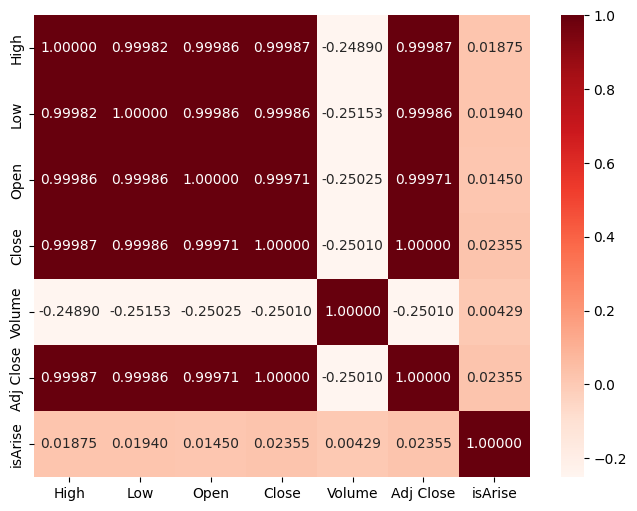

In [4]:
plotHeatMap(newData.corr())

In [5]:
newData.head()

,High,Low,Open,Close,Volume,Adj Close,isArise
Date,,,,,,,
2002-05-23,1.242857,1.145714,1.156429,1.196429,104790000.0,1.196429,False
2002-05-24,1.225000,1.197143,1.214286,1.210000,11104800.0,1.210000,True
2002-05-28,1.232143,1.157143,1.213571,1.157143,6609400.0,1.157143,False
2002-05-29,1.164286,1.085714,1.164286,1.103571,6757800.0,1.103571,False
2002-05-30,1.107857,1.071429,1.107857,1.071429,10154200.0,1.071429,False


In [6]:
dataX = newData[["Close","Volume"]].values[1:]
dataY = newData["isArise"].values[1:]

In [7]:
#before process
newData[["Close","Volume","isArise"]][1:].head()

,Close,Volume,isArise
Date,,,
2002-05-24,1.210000,11104800.0,True
2002-05-28,1.157143,6609400.0,False
2002-05-29,1.103571,6757800.0,False
2002-05-30,1.071429,10154200.0,False
2002-05-31,1.076429,8464400.0,True


In [8]:
st = StandardScaler()
dataX_scaled = st.fit_transform(dataX)

In [9]:
tempScaled = createTempDataFrame(dataX_scaled,columns=["Scaled"],index=data.index[1:])
tempOriginal = createTempDataFrame(newData[["Open","Volume"]].values,columns=["Original"],index=data.index)
pd.concat([tempScaled,tempOriginal],axis=1).head()

,Scaled,Original
Date,,
2002-05-24,[-0.66370471 -0.29371779],[ 1.21428597 11104800. ]
2002-05-28,[-0.66404123 -0.52631557],[ 1.21357095 6609400. ]
2002-05-29,[-0.66438231 -0.51863716],[ 1.16428602 6757800. ]
2002-05-30,[-0.66458695 -0.34290305],[ 1.10785699 10154200. ]
2002-05-31,[-0.66455512 -0.43033548],[ 1.07857096 8464400. ]


In [10]:
le = LabelEncoder()
dataY=le.fit_transform(dataY)

In [11]:
tempY = pd.DataFrame(dataY,columns=["transformed Y values"])
tempY2 = pd.DataFrame(le.inverse_transform(dataY),columns=["original Y values"])
pd.concat([tempY,tempY2],axis=1).head()

,transformed Y values,original Y values
0,1,True
1,0,False
2,0,False
3,0,False
4,1,True


In [12]:
#after process
tempX = pd.DataFrame(list(map(lambda x:str(x),dataX_scaled)),columns=["X values"])
tempY = pd.DataFrame(dataY,columns=["Y values"])
pd.concat([tempX,tempY],axis=1).head()

,X values,Y values
0,[-0.66370471 -0.29371779],1
1,[-0.66404123 -0.52631557],0
2,[-0.66438231 -0.51863716],0
3,[-0.66458695 -0.34290305],0
4,[-0.66455512 -0.43033548],1


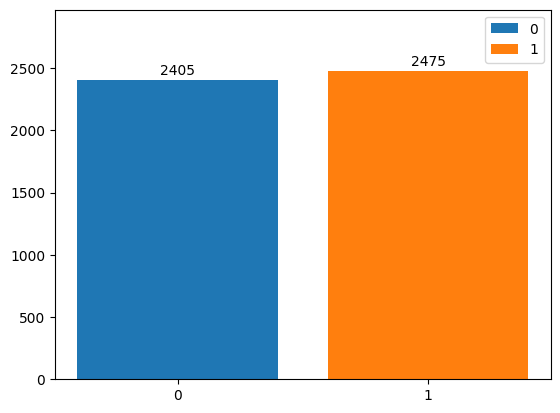

In [13]:
counters=Counter(dataY)

b0=plt.bar(["0"],[counters[0]],label="0")
plt.bar_label(b0,padding=2)

b1=plt.bar(["1"],[counters[1]],label="1")
plt.bar_label(b1,padding=2)

plt.margins(y=0.2)
plt.legend()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(dataX_scaled,dataY,train_size=0.7,shuffle=False)
len(X_train),len(X_test)

(3416, 1464)

In [15]:
svcModel = SVC()
svcModel.fit(X_train,y_train)
svcPredicts=svcModel.predict(X_test)

In [16]:
treeModel = DecisionTreeClassifier()
treeModel.fit(X_train,y_train)
treePredicts=treeModel.predict(X_test)

In [17]:
forestModel = RandomForestClassifier()
forestModel.fit(X_train,y_train)
forestPredicts=forestModel.predict(X_test)

In [18]:
knnModel = KNeighborsClassifier(n_neighbors=5)
knnModel.fit(X_train,y_train)
knnPredicts=knnModel.predict(X_test)

In [19]:
logisticModel = LogisticRegression()
logisticModel.fit(X_train,y_train)
logisticPredictions = logisticModel.predict(X_test)

In [20]:
from tensorflow.keras import Model,layers,models,callbacks
import tensorflow as tf

In [21]:
kerasModel = models.Sequential([
    layers.Dense(input_shape=X_test.shape[1:],units=16,activation="linear"),
    layers.Dense(1,activation="sigmoid")
])
kerasModel.compile(optimizer="adam",loss=tf.keras.losses.binary_crossentropy,metrics=["acc"])

In [22]:
history=kerasModel.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),
                       callbacks= [callbacks.EarlyStopping(patience=7)])

Epoch 1/100
107/107 [==============================] - 1s 6ms/step - loss: 0.7057 - acc: 0.4886 - val_loss: 0.6974 - val_acc: 0.5164
Epoch 2/100
107/107 [==============================] - 0s 4ms/step - loss: 0.6934 - acc: 0.4982 - val_loss: 0.6965 - val_acc: 0.5164
Epoch 3/100
107/107 [==============================] - 0s 4ms/step - loss: 0.6937 - acc: 0.4936 - val_loss: 0.6960 - val_acc: 0.5164
Epoch 4/100
107/107 [==============================] - 0s 4ms/step - loss: 0.6934 - acc: 0.5064 - val_loss: 0.6967 - val_acc: 0.5164
Epoch 5/100
107/107 [==============================] - 0s 4ms/step - loss: 0.6937 - acc: 0.5064 - val_loss: 0.6951 - val_acc: 0.5164
Epoch 6/100
107/107 [==============================] - 0s 4ms/step - loss: 0.6935 - acc: 0.5073 - val_loss: 0.6962 - val_acc: 0.5164
Epoch 7/100
107/107 [==============================] - 0s 4ms/step - loss: 0.6936 - acc: 0.4927 - val_loss: 0.6950 - val_acc: 0.5164
Epoch 8/100
107/107 [==============================] - 0s 4ms/step - 

<AxesSubplot:>

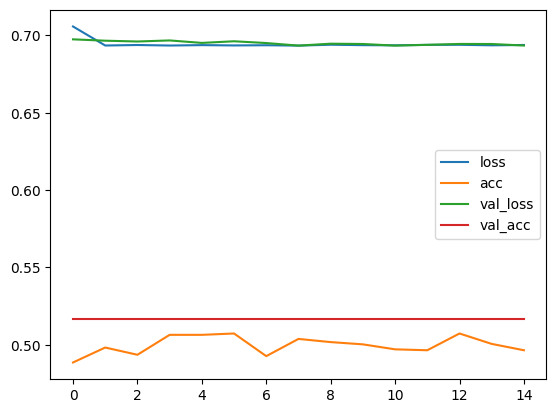

In [23]:
pd.DataFrame(history.history).plot()

In [24]:
artificalPredicteds=kerasModel.predict(X_test)
artificalPredicteds=tf.round(artificalPredicteds)
artificalPredicteds[:4]

46/46 [==============================] - 0s 978us/step


<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.]], dtype=float32)>

In [25]:
fraction=3

svcAccuracyScore = round(accuracy_score(y_test,svcPredicts), fraction)
knnAccuracyScore = round(accuracy_score(y_test,knnPredicts), fraction)
treeAccuracyScore = round(accuracy_score(y_test,treePredicts), fraction)
forestAccuracyScore = round(accuracy_score(y_test,forestPredicts), fraction)
artificalAccuracyScore = round(accuracy_score(y_test,artificalPredicteds), fraction)
logisticAccuracyScore = round(accuracy_score(y_test,logisticPredictions), fraction)


svcPrecisionScore = round(precision_score(y_test,svcPredicts), fraction)
knnPrecisionScore = round(precision_score(y_test,knnPredicts), fraction)
treePrecisionScore = round(precision_score(y_test,treePredicts), fraction)
forestPrecisionScore = round(precision_score(y_test,forestPredicts), fraction)
artificalPrecisionScore = round(precision_score(y_test,artificalPredicteds), fraction)
logisticPrecisionScore = round(precision_score(y_test,logisticPredictions), fraction)


svcRecallScore = round(recall_score(y_test,svcPredicts), fraction)
knnRecallScore = round(recall_score(y_test,knnPredicts), fraction)
treeRecallScore = round(recall_score(y_test,treePredicts), fraction)
forestRecallScore = round(recall_score(y_test,forestPredicts), fraction)
artificalRecallScore = round(recall_score(y_test,artificalPredicteds), fraction)
logisticRecallScore = round(recall_score(y_test,logisticPredictions), fraction)


svcF1Score = round(f1_score(y_test,svcPredicts), fraction)
knnF1Score = round(f1_score(y_test,knnPredicts), fraction)
treeF1Score = round(f1_score(y_test,treePredicts), fraction)
forestF1Score = round(f1_score(y_test,forestPredicts), fraction)
artificalF1Score = round(f1_score(y_test,artificalPredicteds), fraction)
logisticF1Score = round(f1_score(y_test,logisticPredictions), fraction)

In [26]:
items = [
    ItemClassification(artificalPredicteds, artificalAccuracyScore, artificalPrecisionScore,
                       artificalRecallScore, artificalF1Score,"Artifical"),
    
    ItemClassification(logisticPredictions, logisticAccuracyScore, logisticPrecisionScore,
                       logisticRecallScore, logisticF1Score , "Logistic"),
    
    ItemClassification(forestPredicts, forestAccuracyScore, forestAccuracyScore,
                       forestRecallScore, forestF1Score, "Random Forest"),
    
    ItemClassification(treePredicts, treeAccuracyScore, treePrecisionScore,
                       treeRecallScore, treeF1Score, "Decision Tree"),
    
    ItemClassification(knnPredicts, knnAccuracyScore, knnPrecisionScore,
                       knnRecallScore, knnF1Score, "KNN"),
    
    ItemClassification(svcPredicts, svcAccuracyScore, svcPrecisionScore,
                       svcRecallScore, svcF1Score, "SVC")
]

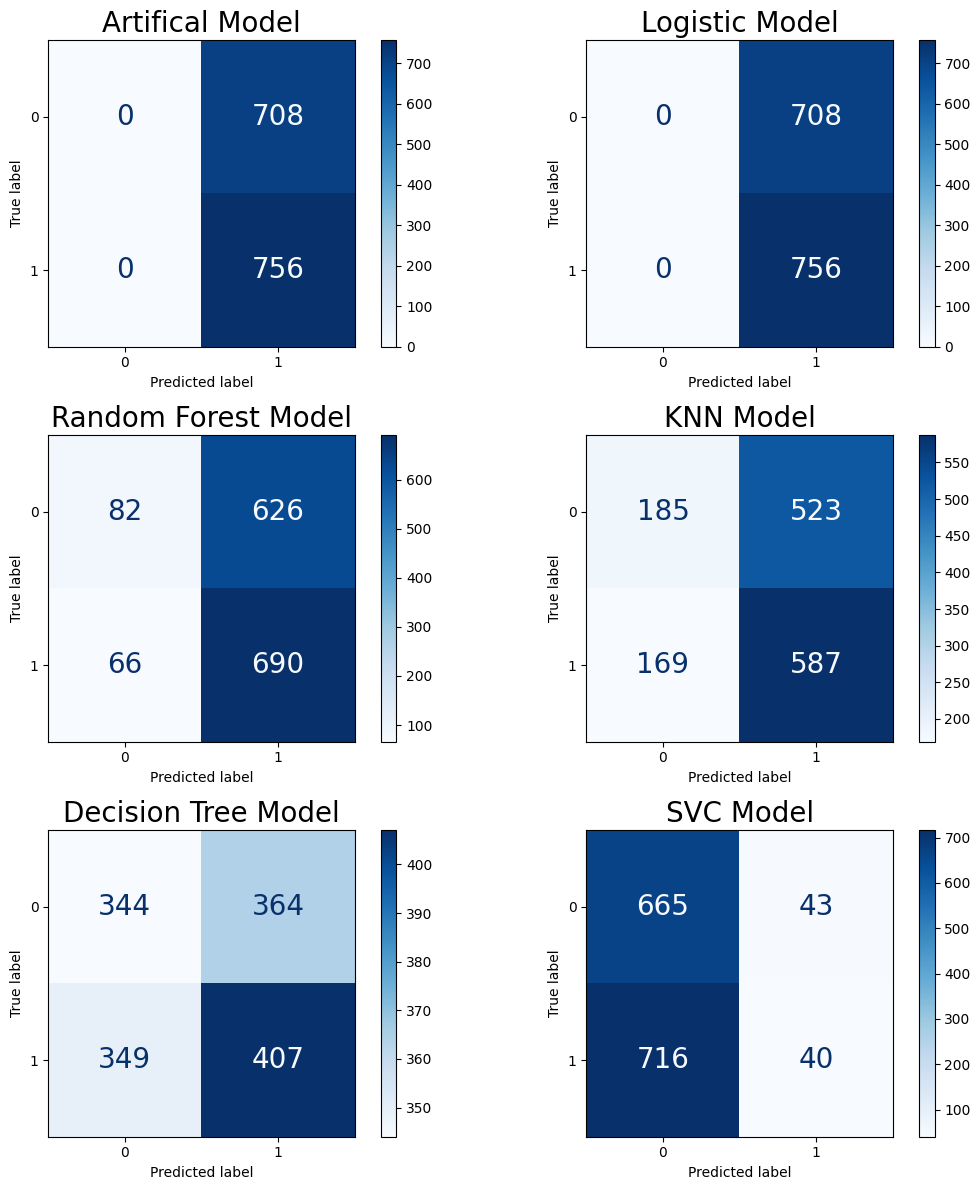

In [27]:
plotConfusionMatrix(items,y_test)

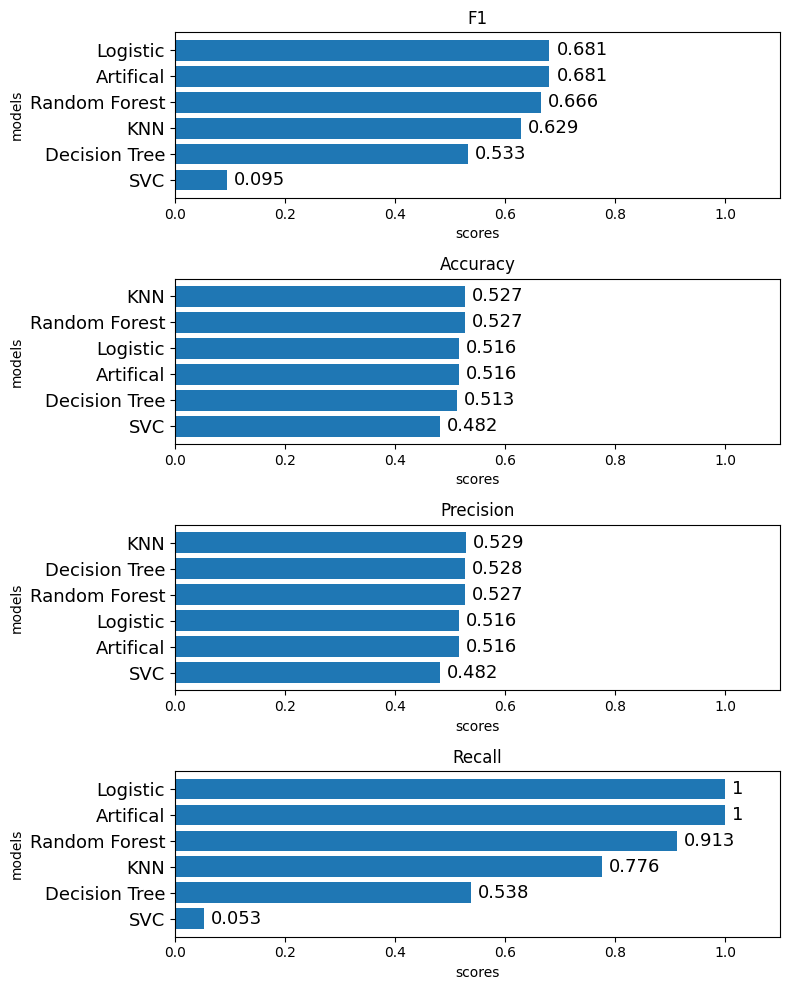

In [29]:
plotClassificationScoresHBars(items,nrows=4,fontsize=13)

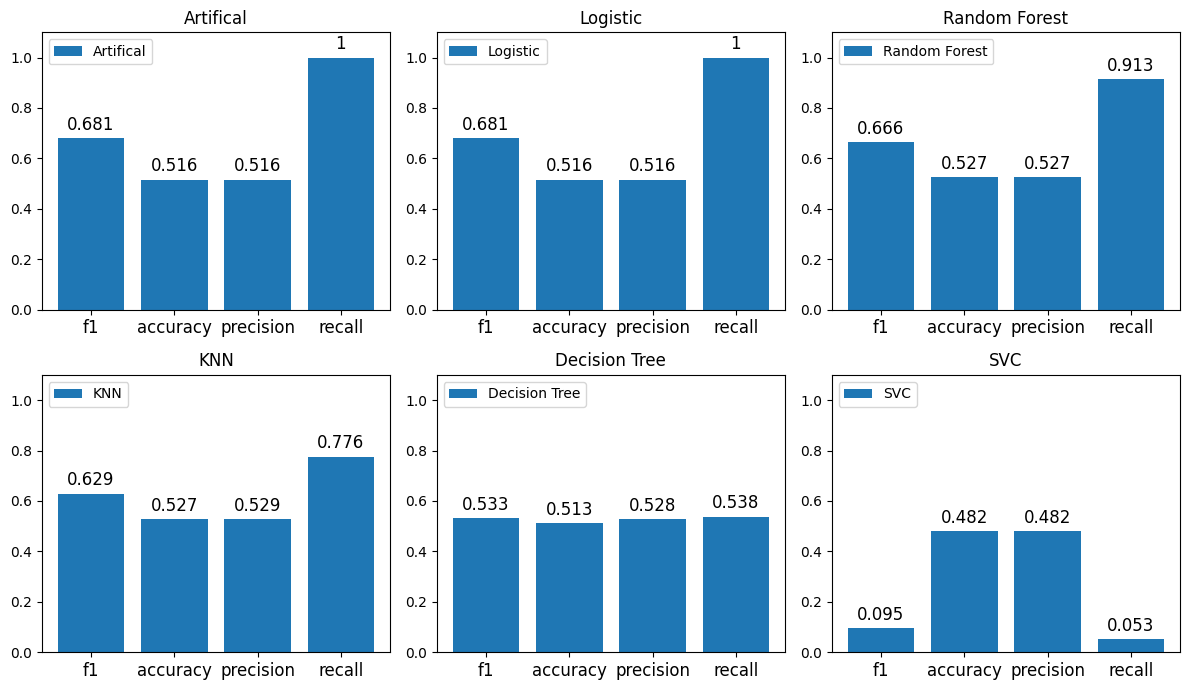

In [43]:
plotClassificationScoreBars(items,fontsize=12)